# Example EDA of toxicity annotation dataset

## Step 1: Download datasets

In [1]:
!wget https://ndownloader.figshare.com/files/7394539 -O toxicity_annotations.tsv 

--2020-10-16 04:50:40--  https://ndownloader.figshare.com/files/7394539
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 99.80.215.51, 52.19.15.100, 52.19.89.222, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|99.80.215.51|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv [following]
--2020-10-16 04:50:40--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394539/toxicity_annotations.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.65.44
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.65.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36177321 (35M) [binary/octet-stream]
Saving to: ‘toxicity_annotations.tsv’

toxicity_annotation 100%[===================>]  34.50M  13.9MB/s    in 2.5s    

2020-10-16 04:50:43 (13.9 MB/s) - ‘toxicity_annotation

In [2]:
!wget https://ndownloader.figshare.com/files/7394542 -O toxicity_annotated_comments.tsv

--2020-10-16 04:50:44--  https://ndownloader.figshare.com/files/7394542
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 99.80.215.51, 52.19.15.100, 52.19.89.222, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|99.80.215.51|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv [following]
--2020-10-16 04:50:45--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7394542/toxicity_annotated_comments.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.65.44
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.65.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78187921 (75M) [binary/octet-stream]
Saving to: ‘toxicity_annotated_comments.tsv’

toxicity_annotated_ 100%[===================>]  74.57M  18.0MB/s    in 4.4s    

2020-10-16 04:50:50 (16.9 MB/s) -

In [3]:
!wget https://ndownloader.figshare.com/files/7640581 -O toxicity_worker_demographics.tsv

--2020-10-16 04:50:51--  https://ndownloader.figshare.com/files/7640581
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 99.80.215.51, 52.19.15.100, 52.19.89.222, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|99.80.215.51|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv [following]
--2020-10-16 04:50:52--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/7640581/toxicity_worker_demographics.tsv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.35
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94645 (92K) [binary/octet-stream]
Saving to: ‘toxicity_worker_demographics.tsv’

toxicity_worker_dem 100%[===================>]  92.43K   223KB/s    in 0.4s    

2020-10-16 04:50:53 (223 KB/s) 

## Step 2: Load tables using pandas

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
toxicity_annotations = pd.read_csv("toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("toxicity_worker_demographics.tsv", delimiter="\t")

Briefly inspect each table.

In [4]:
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [5]:
toxicity_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


In [6]:
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


## Step 3: Join annotation table to demographics table

In [7]:
joined_annotations = toxicity_annotations.join( toxicity_worker_demographics, on="worker_id", rsuffix="_r")

In [8]:
joined_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score,worker_id_r,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,1789.0,male,1.0,30-45,bachelors
1,2232.0,4000,0,0.0,NaN,NaN,NaN,NaN,NaN
2,2232.0,3989,0,1.0,NaN,NaN,NaN,NaN,NaN
3,2232.0,3341,0,0.0,3974.0,male,0.0,18-30,hs
4,2232.0,1574,0,1.0,3863.0,female,0.0,18-30,professional


## Basic EDA

At this point you start asking question.

I can calculate the average score per worker - that worker's "toxicity bias". Is this different for different age groups?

In [9]:
avg_worker_toxicity = joined_annotations.groupby("worker_id")["toxicity_score"].mean()
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

Take a quick look at our newly augmented table.

In [10]:
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education,toxicity_score
0,85,female,0,18-30,bachelors,-0.208768
1,1617,female,0,45-60,bachelors,0.000000
2,1394,female,0,NaN,bachelors,0.258403
3,311,male,0,30-45,bachelors,0.689373
4,1980,male,0,45-60,masters,-0.105263


Now let's compute an average toxicity statistic for each group...

In [11]:
toxicity_worker_demographics.groupby("age_group").toxicity_score.mean()

age_group
18-30       0.219225
30-45       0.204754
45-60       0.190176
Over 60     0.121644
Under 18    0.252275
Name: toxicity_score, dtype: float64

The "toxicity bias" does vary by group!

We can even plot the distribution of personal biases in each group:

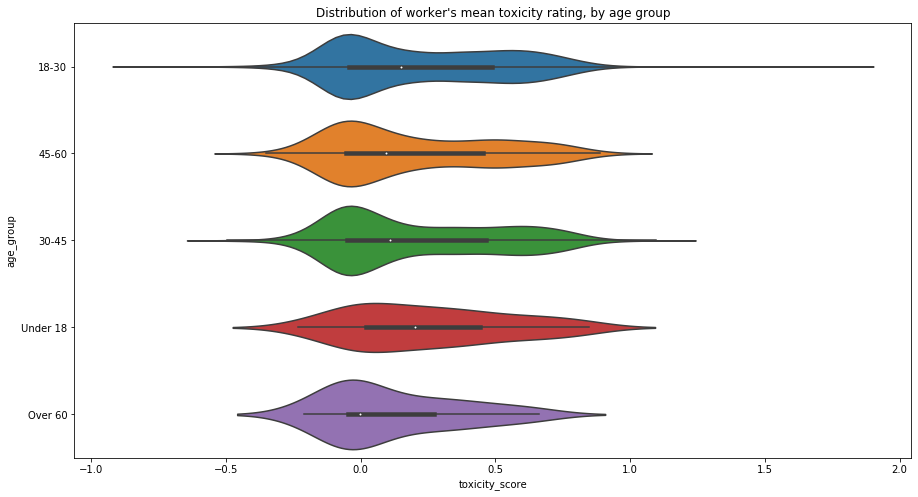

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean toxicity rating, by age group")
sns.violinplot( x="toxicity_score", y="age_group", data=toxicity_worker_demographics, ax=ax )

## A very basic bias question: is the set of annotation workers gender-balanced?

In [15]:
foo = toxicity_worker_demographics.groupby("gender").worker_id.count()
foo/foo.sum()

gender
female    0.351713
male      0.648009
other     0.000278
Name: worker_id, dtype: float64

The answer is **no** - 64.8% of annotators are male.

## Is the set of _annotations_ gender-balanced?

In [16]:
foo = joined_annotations.groupby("gender").rev_id.count()
foo/foo.sum()

gender
female    0.351579
male      0.648109
other     0.000312
Name: rev_id, dtype: float64

Also no, about the same fraction - 64.8% of annotations - were made by male annotators.